In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Concepts and technology of AI/diabetes_.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Handling Missing Values

In [8]:
# Check missing values
df.isnull().sum()

# If any missing values exist
for col in df.columns:
    missing = df[col].isnull().sum()
    if missing > 0:
        df[col].fillna(df[col].mean(), inplace=True)
        # Check missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# --- 1. Separate Feature Matrix and Target Variable ---
X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

print("Feature Matrix (X) Shape:", X.shape)
print("Target Vector (y) Shape:", y.shape)

# --- 2. Train-Test Split From Scratch (70% train, 30% test) ---
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_count = int(len(X) * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# Perform the split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

# Print shapes
print("\nAfter Splitting:")
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

Feature Matrix (X) Shape: (768, 8)
Target Vector (y) Shape: (768,)

After Splitting:
X_train Shape: (538, 8)
X_test Shape: (230, 8)
y_train Shape: (538,)
y_test Shape: (230,)


In [10]:
# 1. Euclidean Distance Function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


# 2. Predict the class for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    # Compute distances from query → all training samples
    distances = [euclidean_distance(query, x) for x in X_train]

    # Get the indices of the k smallest distances
    sorted_indices = np.argsort(distances)

    # Get labels of the k nearest neighbors
    nearest_labels = y_train[sorted_indices[:k]]

    # Majority vote
    return np.bincount(nearest_labels).argmax()


# 3. Predict classes for ALL test samples
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = []
    for x in X_test:
        pred = knn_predict_single(x, X_train, y_train, k)
        predictions.append(pred)
    return np.array(predictions)


# 4. Accuracy Function
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100



# 5. Evaluate the model (k = 3)
predictions = knn_predict(X_test, X_train, y_train, k=3)

accuracy = compute_accuracy(y_test, predictions)

print("Predictions for test set:", predictions[:10])   # show first 10 predictions
print("Actual labels:", y_test[:10])                  # show first 10 actual labels
print(f"\nKNN Accuracy on Diabetes Test Set: {accuracy:.2f}%")

Predictions for test set: [0 1 0 1 1 1 0 0 1 1]
Actual labels: [0 0 0 0 0 0 0 0 0 0]

KNN Accuracy on Diabetes Test Set: 67.39%


2: Scaling + Comparison

Feature Scaling (Min-Max Normalization)

In [11]:
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
print (X_scaled)


[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [12]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)


Run KNN on Scaled Data

In [13]:
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
acc_scaled = compute_accuracy(y_test_s, pred_scaled)
acc_scaled


np.float64(69.1304347826087)


Comparison

In [14]:
print("Accuracy without scaling:", accuracy)
print("Accuracy with scaling:", acc_scaled)

Accuracy without scaling: 67.3913043478261
Accuracy with scaling: 69.1304347826087


3: Experimentation with k (1–15)


Function to Measure Accuracy and Time

In [15]:
def experiment_k_values(X_train, X_test, y_train, y_test, k_values):
    accuracies = []
    times = []

    for k in k_values:
        start = time.time()
        preds = knn_predict(X_test, X_train, y_train, k=k)
        end = time.time()

        accuracies.append(compute_accuracy(y_test, preds))
        times.append(end - start)

    return accuracies, times


Run for Original Dataset

In [16]:
k_vals = range(1, 16)
acc_org, time_org = experiment_k_values(X_train, X_test, y_train, y_test, k_vals)


Run for Scaled Dataset

In [17]:
acc_scaled, time_scaled = experiment_k_values(X_train_s, X_test_s, y_train_s, y_test_s, k_vals)


Plot k vs Accuracy

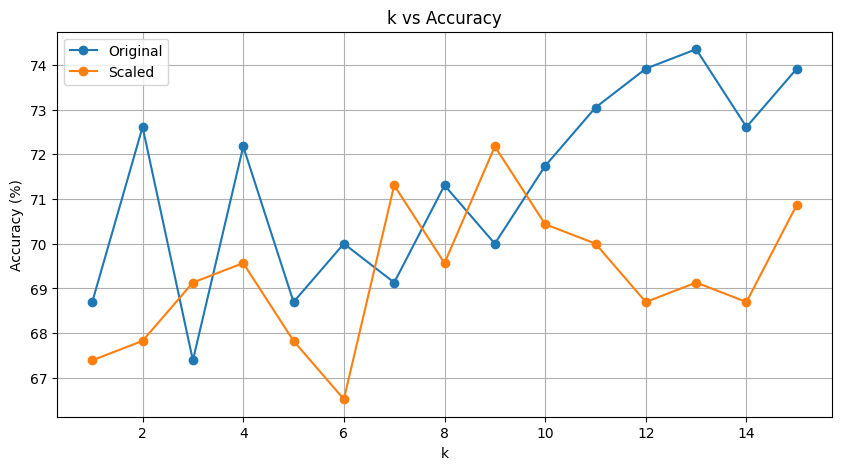

In [18]:
plt.figure(figsize=(10,5))
plt.plot(k_vals, acc_org, marker='o', label="Original")
plt.plot(k_vals, acc_scaled, marker='o', label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()



Plot k vs Time Taken

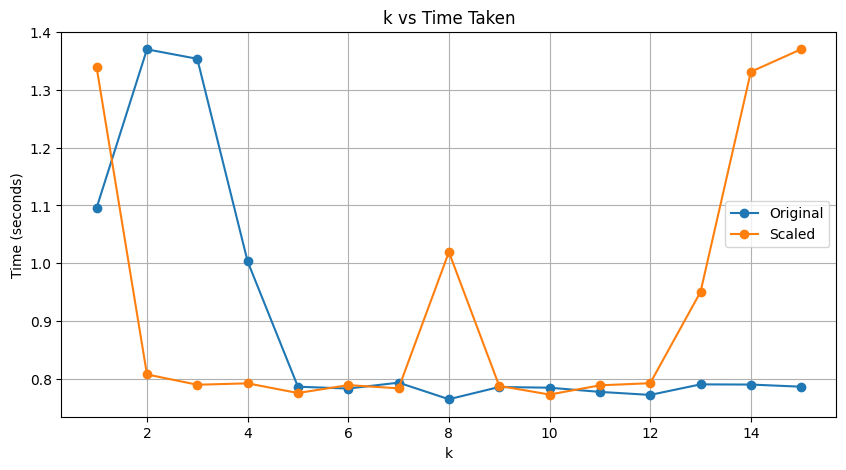

In [19]:
plt.figure(figsize=(10,5))
plt.plot(k_vals, time_org, marker='o', label="Original")
plt.plot(k_vals, time_scaled, marker='o', label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Time Taken")
plt.legend()
plt.grid(True)
plt.show()
